# FYS-STK 4155 H20 PROJECT 1

## Definitions

In [2]:
from utils import *
from ols import *
from ridge import *
from lasso import *

In [3]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 10
MEDIUM = 14
LARGE = 20
THICK = 4
THIN = 2

plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=SMALL, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
NOISE = .02
NUM_SAMPLES = 250
MAX_POLY_ORDER = 5
NUM_BOOTSTRAPS = 20
np.random.seed(0)

### OLS bias-variance tradeoff

In [5]:
polynomial_orders = list(range(MAX_POLY_ORDER+1))

In [81]:
x, y = randmesh(sn=NUM_SAMPLES, random_state=0)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

# 100 samples
X100_0 = X[:100]
z100_0 = z[:100]
f100_0 = f[:100]
ols_bs_100_0 = run_ols_bootstrap(X100_0, z100_0, f100_0, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 1000 samples
X1000_0 = X[:1000]
z1000_0 = z[:1000]
f1000_0 = f[:1000]
ols_bs_1000_0 = run_ols_bootstrap(X1000_0, z1000_0, f1000_0, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 10000 samples
X10000_0 = X[:10000]
z10000_0 = z[:10000]
f10000_0 = f[:10000]
ols_bs_10000_0= run_ols_bootstrap(X10000_0, z10000_0, f10000_0, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)


x, y = randmesh(sn=NUM_SAMPLES, random_state=1)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

# 100 samples
X100_1 = X[:100]
z100_1 = z[:100]
f100_1 = f[:100]
ols_bs_100_1 = run_ols_bootstrap(X100_1, z100_1, f100_1, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 1000 samples
X1000_1 = X[:1000]
z1000_1 = z[:1000]
f1000_1 = f[:1000]
ols_bs_1000_1 = run_ols_bootstrap(X1000_1, z1000_1, f1000_1, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 10000 samples
X10000_1 = X[:10000]
z10000_1 = z[:10000]
f10000_1 = f[:10000]
ols_bs_10000_1= run_ols_bootstrap(X10000_1, z10000_1, f10000_1, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)


x, y = randmesh(sn=NUM_SAMPLES, random_state=2)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

# 100 samples
X100_2 = X[:100]
z100_2 = z[:100]
f100_2 = f[:100]
ols_bs_100_2 = run_ols_bootstrap(X100_2, z100_2, f100_2, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 1000 samples
X1000_2 = X[:1000]
z1000_2 = z[:1000]
f1000_2= f[:1000]
ols_bs_1000_2 = run_ols_bootstrap(X1000_2, z1000_2, f1000_2, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

# 10000 samples
X10000_2 = X[:10000]
z10000_2 = z[:10000]
f10000_2 = f[:10000]
ols_bs_10000_2= run_ols_bootstrap(X10000_2, z10000_2, f10000_2, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

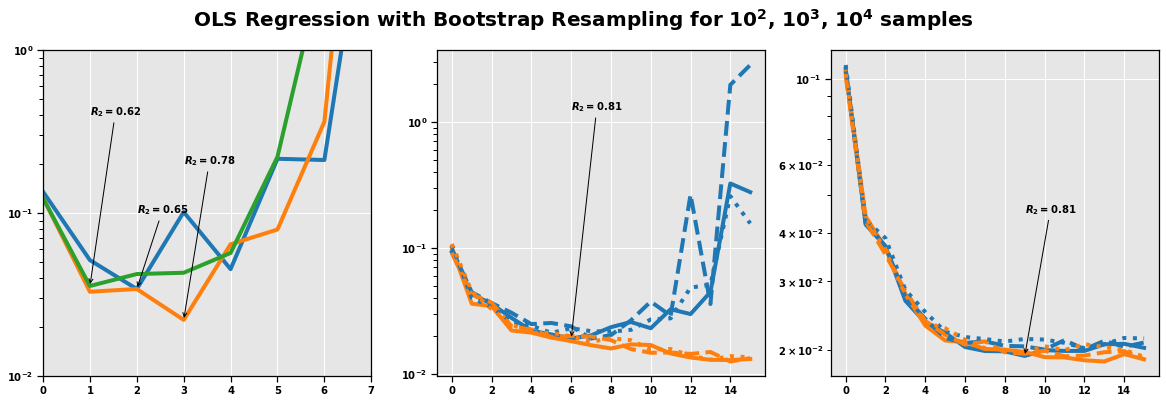

In [91]:
plt.figure(figsize=(20,6))
plt.suptitle("OLS Regression with Bootstrap Resampling for $10^2$, $10^3$, $10^4$ samples", fontsize=LARGE, weight='bold')



plt.subplot(131)
plt.plot(polynomial_orders, ols_bs_100_0['test_mse'])
plt.plot(polynomial_orders, ols_bs_100_1['test_mse'])
plt.plot(polynomial_orders, ols_bs_100_2['test_mse'])
plt.yscale('log')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(.01,1)
plt.xlim(0,7)
best_idx = ols_bs_100_0['test_mse'].argmin()
best_mse_pn = polynomial_orders[best_idx]
best_mse_val = ols_bs_100_0['test_mse'].min()
xytext = (best_mse_pn, .1)
xy = (best_mse_pn, best_mse_val)
R2 = best_r2(ols_bs_100_0["test_mse"], z100_0)
plt.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

best_idx = ols_bs_100_1['test_mse'].argmin()
best_mse_pn = polynomial_orders[best_idx]
best_mse_val = ols_bs_100_1['test_mse'].min()
xytext = (best_mse_pn, .2)
xy = (best_mse_pn, best_mse_val)
R2 = best_r2(ols_bs_100_1["test_mse"], z100_1)
plt.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

best_idx = ols_bs_100_2['test_mse'].argmin()
best_mse_pn = polynomial_orders[best_idx]
best_mse_val = ols_bs_100_2['test_mse'].min()
xytext = (best_mse_pn, .4)
xy = (best_mse_pn, best_mse_val)
R2 = best_r2(ols_bs_100_2["test_mse"], z100_2)
plt.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

plt.subplot(132)
plt.plot(polynomial_orders, ols_bs_1000_0['test_mse'], color=COLORS[0], linestyle='-')
plt.plot(polynomial_orders, ols_bs_1000_0['train_mse'], color=COLORS[1], linestyle='-')
plt.plot(polynomial_orders, ols_bs_1000_1['test_mse'], color=COLORS[0], linestyle='--')
plt.plot(polynomial_orders, ols_bs_1000_1['train_mse'], color=COLORS[1], linestyle='--')
plt.plot(polynomial_orders, ols_bs_1000_2['test_mse'], color=COLORS[0], linestyle=':')
plt.plot(polynomial_orders, ols_bs_1000_2['train_mse'], color=COLORS[1], linestyle=':')
plt.yscale('log')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

best_idx = ols_bs_1000_0['test_mse'].argmin()
best_mse_pn = polynomial_orders[best_idx]
best_mse_val = ols_bs_1000_0['test_mse'].min()
xytext = (best_mse_pn, sum(plt.ylim())/3)
xy = (best_mse_pn, best_mse_val)
R2 = best_r2(ols_bs_1000_0["test_mse"], z1000_0)
plt.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

plt.subplot(133)

plt.plot(polynomial_orders, ols_bs_10000_0['test_mse'], color=COLORS[0], linestyle='-')
plt.plot(polynomial_orders, ols_bs_10000_0['train_mse'], color=COLORS[1], linestyle='-')
plt.plot(polynomial_orders, ols_bs_10000_1['test_mse'], color=COLORS[0], linestyle='--')
plt.plot(polynomial_orders, ols_bs_10000_1['train_mse'], color=COLORS[1], linestyle='--')
plt.plot(polynomial_orders, ols_bs_10000_2['test_mse'], color=COLORS[0], linestyle=':')
plt.plot(polynomial_orders, ols_bs_10000_2['train_mse'], color=COLORS[1], linestyle=':')
plt.yscale('log')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

best_idx = ols_bs_10000_0['test_mse'].argmin()
best_mse_pn = polynomial_orders[best_idx]
best_mse_val = ols_bs_10000_0['test_mse'].min()
xytext = (best_mse_pn, sum(plt.ylim())/3)
xy = (best_mse_pn, best_mse_val)
R2 = best_r2(ols_bs_10000_0["test_mse"], z10000_0)
plt.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})



plt.show()



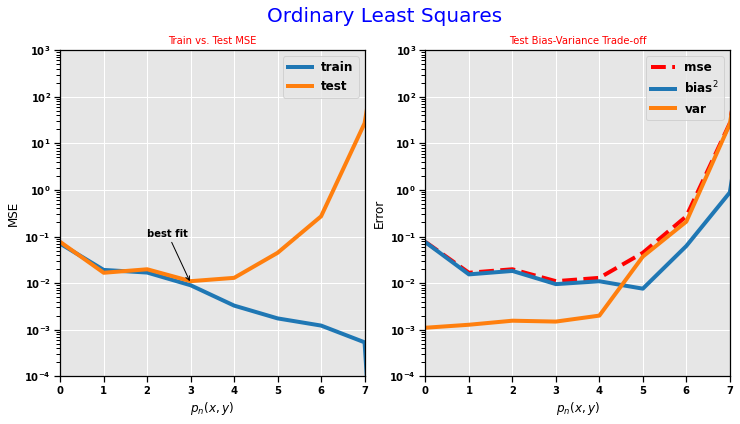

In [20]:
plt.figure(figsize=(12,6))
ylim = (1E-4, 1E3)
xlim = (0,7)

plt.subplot(121)
plt.plot('pol_order', 'train_mse', data=ols_bs_df)
plt.plot('pol_order', 'test_mse', data=ols_bs_df)
plt.title("Train vs. Test MSE", fontsize=10, color='red')
#plt.text(2, .2E7, 'breakdown $\lambda$')
plt.annotate('best fit', xy=(3,.01), xytext=(2, .1), arrowprops={'arrowstyle':'->'})
plt.yscale('log')
plt.xlabel("$p_n(x,y)$")
plt.ylabel("MSE")
plt.grid(True)
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(["train", "test"])

plt.subplot(122)
plt.plot('pol_order', 'test_mse', 'r--', data=ols_bs_df)
plt.plot('pol_order', 'test_bias', data=ols_bs_df)
plt.plot('pol_order', 'test_var', data=ols_bs_df)
plt.title("Test Bias-Variance Trade-off", fontsize=10, color='red')
plt.yscale('log')
plt.xlabel("$p_n(x,y)$")
plt.ylabel("Error")
plt.grid(True)
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(["mse", "bias$^2$", "var"])

#ax = plt.gca()
#ax.set_yticklabels([])


plt.suptitle("Ordinary Least Squares", fontsize=20, color='blue')
plt.show()

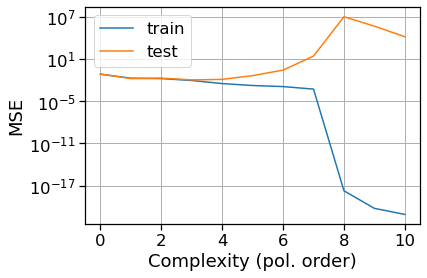

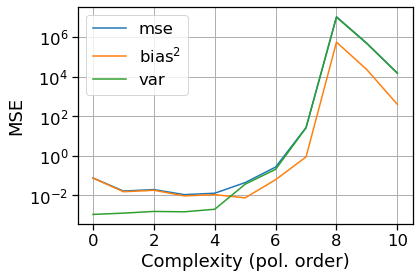

In [4]:
ax = ols_bs_df.plot(x="pol_order", y=["train_mse", "test_mse"], logy=True)
ax.legend(["train", "test"])
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")

ax.grid(True)
plt.show()

ax = ols_bs_df.plot(x="pol_order", y=["test_mse", "test_bias", "test_var"], logy=True)
ax.legend(["mse", "bias$^2$", "var"])
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")
#ax.set_xlim(0,15)
#ax.set_ylim(1E-4,1)
ax.grid(True)
plt.show()

## OLS with $k$-fold cross-validation resampling
The data is randomized, so we don't need to do that again.

### OLS train vs. test MSE

In [5]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, _, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

polynomial_orders = list(range(MAX_POLY_ORDER+1))
ols_k_df = run_ols_kfold(X, z, k=10, polynomial_orders=polynomial_orders)

print(best_r2(ols_k_df["test_mse"], z))

0.910185448299346


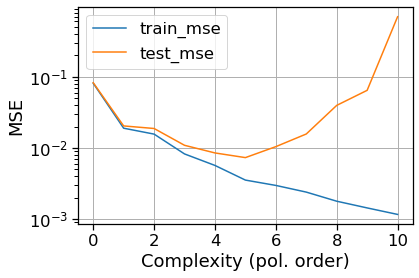

In [6]:
ax = ols_k_df.plot(x="pol_order", logy=True)
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")

ax.grid(True)
plt.show()

## Ridge with bootstrap resampling

### Ridge bias-variance tradeoff

In [91]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-4, 2, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1,1))

ridge_bs_df = run_ridge_bootstrap(X, z, f, polynomial_orders=polynomial_orders, lambdas=lambdas, train_size=.7, bootstraps=20)

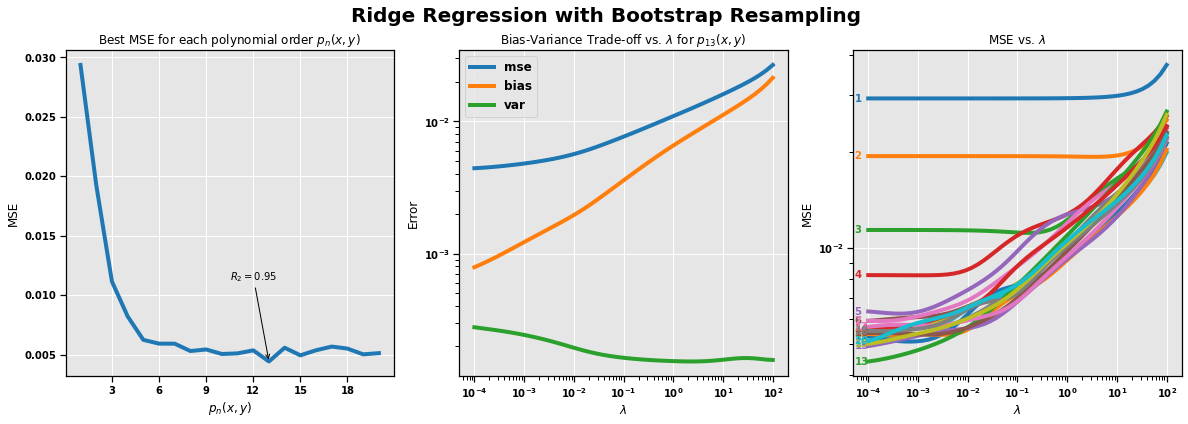

In [96]:
# Plotting Ridge with Bootstrap

best_mse = find_best_lambdas(df=ridge_bs_df, polynomial_orders=polynomial_orders, col_prefix='test_mse_')
best_mse_idx = np.argmin(best_mse)
best_mse_pn = polynomial_orders[best_mse_idx]
best_mse_val = best_mse[best_mse_idx]

plt.figure(figsize=(20,6))
plt.suptitle("Ridge Regression with Bootstrap Resampling", fontsize=LARGE, weight='bold')

plt.subplot(131)
plt.plot(polynomial_orders, best_mse)
#plt.yscale('log')
plt.title("Best MSE for each polynomial order $p_n(x,y)$")
plt.xlabel("$p_n(x,y)$")
plt.ylabel("MSE")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xytext = (sum(plt.xlim())/2, sum(plt.ylim())/3)
xy = (best_mse_pn, best_mse_val)
plt.annotate(f'$R_2 = {best_r2(best_mse, z):.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

plt.subplot(132)
pn = best_mse_pn
plt.plot(ridge_bs_df['lambda'], ridge_bs_df[f'test_mse_{pn}'])
plt.plot(ridge_bs_df['lambda'], ridge_bs_df[f'test_bias_{pn}'])
plt.plot(ridge_bs_df['lambda'], ridge_bs_df[f'test_var_{pn}'])
plt.legend(['mse', 'bias$^2$', 'var'])
plt.title(f"Bias-Variance Trade-off vs. $\lambda$ for $p_{{{pn}}}(x,y)$")
plt.xlabel("$\lambda$")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')

plt.subplot(133)
names = [f'test_mse_{pn}' for pn in polynomial_orders]
for name in names:
    plt.plot(ridge_bs_df['lambda'], ridge_bs_df[name])
    
ax = plt.gca()
for line, pn in zip(ax.lines, polynomial_orders):
    y = line.get_ydata()[0]
    ax.annotate(str(pn), xy=(0,y), xytext=(1,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=SMALL, va="center")    
    
plt.title("MSE vs. $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.xscale('log')
plt.yscale('log')

plt.show()

## Ridge with $k$-fold cross-validation resampling

### Ridge train vs. test MSE

In [109]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, var_eps = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-8, 2, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1,1))

ridge_k_df = run_ridge_kfold(X, z, k=10, polynomial_orders=polynomial_orders, lambdas=lambdas)


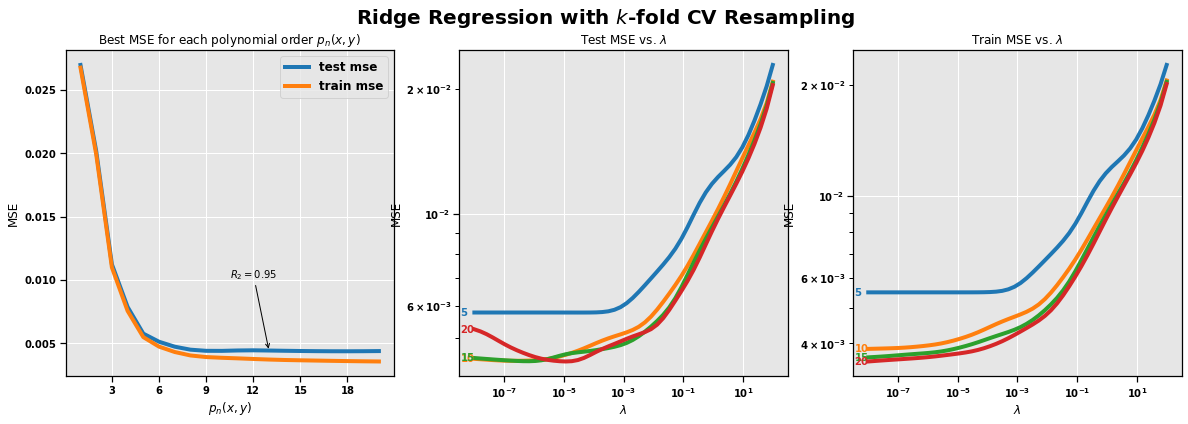

In [114]:
# Plotting Ridge with CV
polynomial_orders = list(range(1,MAX_POLY_ORDER+1,1))
best_mse_train = find_best_lambdas(df=ridge_k_df, polynomial_orders=polynomial_orders, col_prefix='train_mse_')
best_mse_test = find_best_lambdas(df=ridge_k_df, polynomial_orders=polynomial_orders, col_prefix='test_mse_')
best_mse_idx = np.argmin(best_mse)
best_mse_pn = polynomial_orders[best_mse_idx]
best_mse_val = best_mse[best_mse_idx]

plt.figure(figsize=(20,6))
plt.suptitle("Ridge Regression with $k$-fold CV Resampling", fontsize=20, weight='bold')

plt.subplot(131)
plt.plot(polynomial_orders, best_mse_test)
plt.plot(polynomial_orders, best_mse_train)
plt.legend(['test mse', 'train mse'])
#plt.yscale('log')
plt.title("Best MSE for each polynomial order $p_n(x,y)$")
plt.xlabel("$p_n(x,y)$")
plt.ylabel("MSE")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xytext = (sum(plt.xlim())/2, sum(plt.ylim())/3)
xy = (best_mse_pn, best_mse_val)
plt.annotate(f'$R_2 = {best_r2(best_mse_test, z):.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

polynomial_orders = polynomial_orders[4::5]

plt.subplot(132)
names = [f'test_mse_{pn}' for pn in polynomial_orders]
for name in names:
    plt.plot(ridge_k_df['lambda'], ridge_k_df[name])
    
ax = plt.gca()
for line, pn in zip(ax.lines, polynomial_orders):
    y = line.get_ydata()[0]
    ax.annotate(str(pn), xy=(0,y), xytext=(1,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=SMALL, va="center")    
    
plt.title("Test MSE vs. $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.xscale('log')
plt.yscale('log')


plt.subplot(133)
names = [f'train_mse_{pn}' for pn in polynomial_orders]
for name in names:
    plt.plot(ridge_k_df['lambda'], ridge_k_df[name])
    
ax = plt.gca()
for line, pn in zip(ax.lines, polynomial_orders):
    y = line.get_ydata()[0]
    ax.annotate(str(pn), xy=(0,y), xytext=(1,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=SMALL, va="center")    
    
plt.title("Train MSE vs. $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.xscale('log')
plt.yscale('log')

plt.show()

In [13]:
#plt.figure(figsize=(10,5))
#sns.heatmap(DataFrame(Vt.T @ np.linalg.inv(S**2 + L) @ S @ U.T))

In [14]:
#plt.figure(figsize=(10,5))
#sns.heatmap(DataFrame(Vt.T @ np.linalg.pinv(X_resampled)))

## LASSO with bootstrap resampling

In [15]:
#%%timeit -n1 -r1
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-7, 0, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1, 1))
#polynomial_orders = [1,3,5,7,9]

skl_lasso_opts = {'max_iter':1E5, 'fit_intercept':False, 'warm_start':True, 'precompute':True, 'tol':.01, 'selection':'random', 'random_state':0}
lasso_bs_df = lasso_bootstrap(X, z, f, polynomial_orders=polynomial_orders, lambdas=lambdas, train_size=.7, bootstraps=20, **skl_lasso_opts)

In [16]:
pn = polynomial_orders[-1]
print(best_r2(lasso_bs_df[f"test_mse_{pn}"], z))

0.8091714793768374


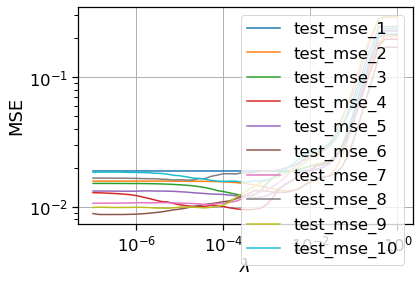

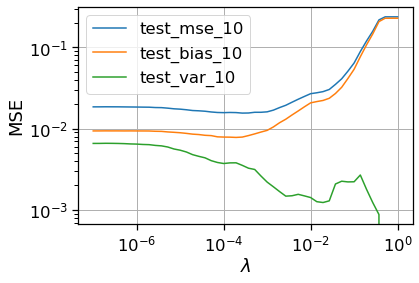

In [17]:

ax = lasso_bs_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

pn = pn
ax = lasso_bs_df.plot(x="lambda", y=[f"test_mse_{pn}", f"test_bias_{pn}", f"test_var_{pn}"], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

plt.show()

In [18]:
#%%timeit -n1 -r1
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, var_eps = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-6, 0, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1, 1))
#polynomial_orders = [5,10,15]

skl_lasso_opts = {'max_iter':1E5, 'fit_intercept':False, 'warm_start':True, 'precompute':True, 'tol':.001, 'selection':'random', 'random_state':0}
lasso_k_df = lasso_kfold(X, z, k=10, polynomial_orders=polynomial_orders, lambdas=lambdas, **skl_lasso_opts)

In [19]:
pn = polynomial_orders[-1]
print(best_r2(lasso_k_df[f"test_mse_{pn}"], z))

0.9159706204152206


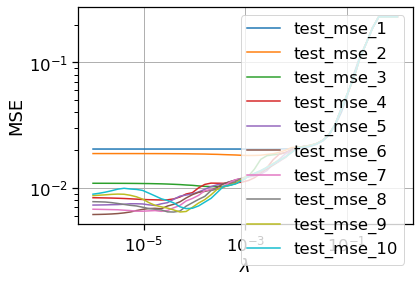

In [20]:
ax = lasso_k_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

In [ ]:
NUM_SAMPLES = 1000
MAX_POLY_ORDER = 15
VAR_EPS = .015
polynomial_orders = list(range(1,MAX_POLY_ORDER+1))

x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], var_eps=VAR_EPS)
lambdas = np.logspace(-6, 2, 20)


samples = [100,250,500,1000]

data = list()
for sn in samples:
    X_down = X[:sn]
    z_down = z[:sn]
    f_down = f[:sn]
    ridge_bs_df = run_ridge_bootstrap(X_down, z_down, f_down, polynomial_orders=polynomial_orders, lambdas=lambdas, train_size=.7, bootstraps=25)
    test_mse = ridge_bs_df[[f'test_mse_{pn}' for pn in polynomial_orders]]
    data.append(test_mse)

ylabels = list()
for i, lmd in enumerate(lambdas):
    if i%5:
        ylabels.append('')
        continue
    ylabels.append(f'{lmd:.1e}')

mi, ma = np.min(data), np.max(data)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=WIDE_FIG, sharey=True, squeeze=True)
for i, sn in enumerate(samples):
    sns.heatmap(data[i], ax=axes[i], yticklabels=ylabels, xticklabels=polynomial_orders, norm=LogNorm(vmin=mi, vmax=ma), cmap='viridis', cbar=(i==len(samples)-1))

fig.tight_layout()
plt.show()